In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import cv2 as cv
# from skimage.measure import LineModelND, ransac
#from sklearn import linear_model, datasets
from skimage.measure import ransac, LineModelND, CircleModel

import math
#print('hi')


hi


NameError: name 'dostance' is not defined

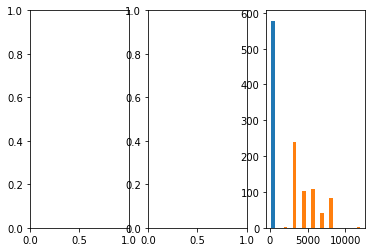

In [6]:
ax1=plt.subplot(131)
ax2=plt.subplot(132)
ax3=plt.subplot(133)

df = pd.read_csv('capture1.csv',delimiter=',')
ax3.hist(df.values)
angle = df.values[:,0]
distance = df.values[:,1]

x= angle
y= distance
ax1.bar(y,y,align='center') # A bar chart
ax1.xlabel('angle')
pax1.ylabel('distance')

ax1.show()
#print(data1)
cartesian = [(r*math.cos(phi*math.pi/180), r*math.sin(phi*math.pi/180)) for r, phi in zip(distance, angle)]
#print(x,y)
x, y = map(list, zip(*cartesian))
#print(cartesian)
ax1.hist(x)
ax2.hist(y)
#plt.show()

# coverting this into 2d array
x=  np.array(x)
y=  np.array(y)
print(x.shape)
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)
print('hi: ',x.shape)

# generate coordinates of line
#x = np.arange(-200, 200)

#y = 0.2 * x + 20
data = np.column_stack([x, y])
#print(data)
print(data.shape)
img = np.zeros([100,100,3],dtype=np.uint8)


In [2]:
#print(data1)
theta=   np.radians(angle)
#print(theta)
data1 = np.column_stack([theta,distance])

# ##########fit line using all data
#model = CircleModel()
#model.estimate(data1)    # estimate random data

##############
model = LineModelND()
model.estimate(data)
# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(data, LineModelND, min_samples=20,
                               residual_threshold=10, max_trials=1000)
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(x.min(), x.max())[:, np.newaxis]
line_y = model.predict_x(line_x)
line_y_robust = model_robust.predict_y(line_x)
print(line_y_robust)

fig, ax = plt.subplots( projection='polar')
ax.plot(data1[inliers, 0], data1[inliers, 1], '.b', alpha=0.6,label='Inlier data',projection='polar')

ax = plt.subplot(111, projection='polar')
ax.scatter(theta, distance)
#ax.plot( line_y, '-k', label='Line model from all data')
ax.plot( line_y_robust, '-b', label='Robust line model')
#ax.legend(loc='lower left')
#ax.show()

NameError: name 'angle' is not defined